## Imports

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import torch
import torchvision.transforms as transforms

## Loading the dataset

Dataset can be found at: https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset

In [65]:
X = np.load("../dataset/X.npy")
y = np.load("../dataset/Y.npy")

## Dataset shapes

In [66]:
X.shape

(22801, 128, 128, 3)

In [67]:
y.shape

(22801, 1)

##### Number of instances

In [68]:
n_instances = X.shape[0]
print(f'Number of instances in the dataset is {n_instances}.')

Number of instances in the dataset is 22801.


##### Number of classes and their values

In [69]:
classes_names = np.unique(y)
n_classes = len(classes_names)
print(f'Number of classes is {n_classes}.', f'Their labels are {classes_names}.', sep='\n')

Number of classes is 27.
Their labels are ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'NULL' 'a' 'b' 'bye' 'c' 'd' 'e'
 'good' 'good morning' 'hello' 'little bit' 'no' 'pardon' 'please'
 'project' 'whats up' 'yes'].


## Visualizing few instances and their labels

##### Generating $k$ random numbers from $0, ..., n\_instances $ to visualize $k$ instances from the dataset

In [70]:
k = 51

In [71]:
indices = random.sample(range(n_instances), k)
print(indices)

[15145, 8030, 2975, 16708, 17689, 15027, 19712, 532, 1935, 26, 17648, 4350, 1623, 17026, 9593, 8464, 10457, 16770, 21750, 10970, 8968, 13635, 6746, 16928, 18719, 18487, 18973, 7603, 21260, 5160, 892, 2541, 18245, 19254, 11758, 17660, 11405, 14653, 3253, 4838, 9103, 16214, 17661, 1174, 14145, 6368, 15005, 1600, 4348, 5430, 18498]


##### Visualizing k instances 

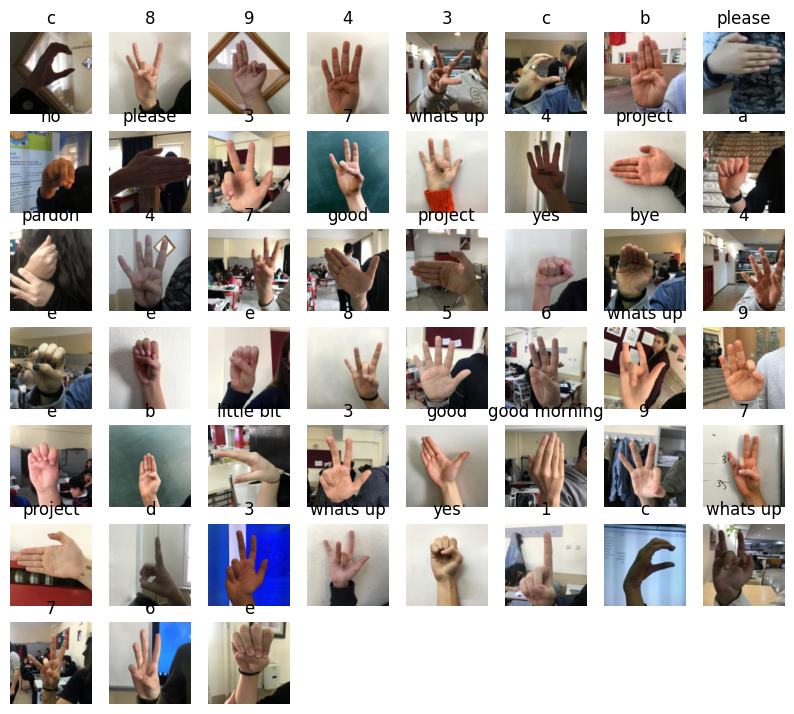

In [72]:
plt.figure(figsize=(10, 10))

for i in range(k):
    plt.subplot(int(np.ceil(np.sqrt(k))), int(np.ceil(np.sqrt(k))), i + 1)
    plt.imshow(X[indices[i]])
    plt.title(y[indices[i]][0])
    plt.axis('off')

plt.show()

### Number of instances per class
##### Checking if dataset is well balanced

In [73]:
y_series = pd.Series(np.ravel(y))
class_counts = y_series.value_counts()
class_counts

b               866
0               866
please          865
whats up        865
2               865
3               865
d               865
c               865
good morning    865
yes             865
hello           865
little bit      865
good            865
5               865
pardon          865
project         865
8               865
bye             865
1               865
6               865
7               865
9               865
no              865
4               864
a               863
e               863
NULL            314
Name: count, dtype: int64

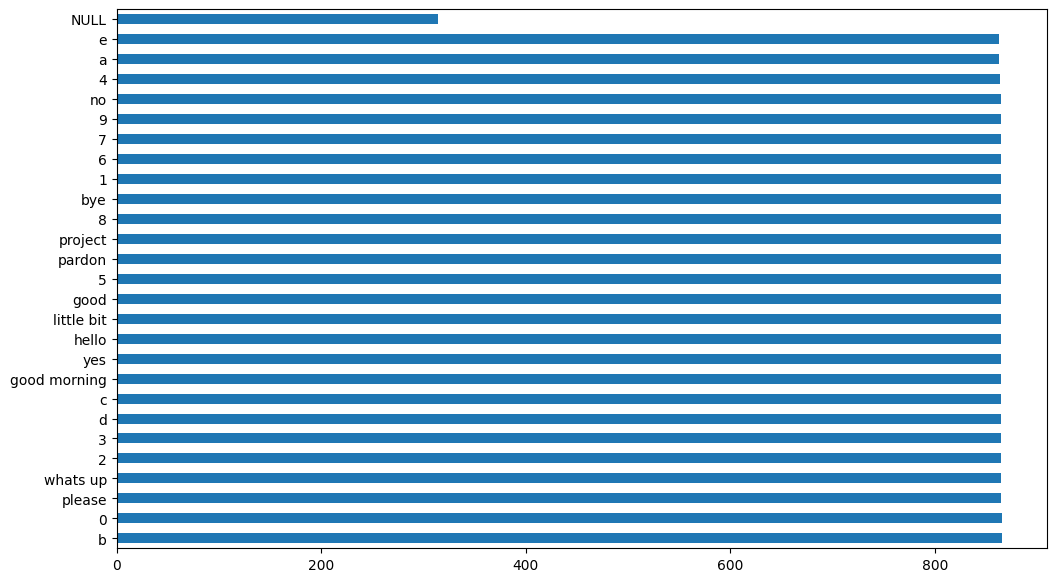

In [74]:
plt.figure(figsize=(12,7))
class_counts.plot(kind='barh')

plt.show()

## Transforming the dataset

In [75]:
image_size=32
mean=0
stddev=1

In [76]:
# Transforming X
X = X.astype(np.float32)

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize((mean,), (stddev,))
])

X_transformed = torch.stack([transform(image) for image in X])

In [77]:
# Transfomring y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.ravel())
y_transformed = torch.tensor(y_encoded)

In [78]:
# Checking the shapes
X_transformed.shape, y_transformed.shape

(torch.Size([22801, 3, 32, 32]), torch.Size([22801]))

## Spliting the dataset

In [86]:
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Saving split dataset

In [88]:
train_folder = '../train'
os.makedirs(train_folder, exist_ok=True)

valid_folder = '../valid'
os.makedirs(valid_folder, exist_ok=True)

test_folder = '../test'
os.makedirs(test_folder, exist_ok=True)

# Define the file paths
X_train_file_path = os.path.join(train_folder, 'X_train.pt')
X_valid_file_path = os.path.join(valid_folder, 'X_valid.pt')
X_test_file_path = os.path.join(test_folder, 'X_test.pt')
y_train_file_path = os.path.join(train_folder, 'y_train.pt')
y_valid_file_path = os.path.join(valid_folder, 'y_valid.pt')
y_test_file_path = os.path.join(test_folder, 'y_test.pt')

# Save the .npy files
torch.save(X_train, X_train_file_path)
torch.save(y_train, y_train_file_path)
torch.save(X_val, X_valid_file_path)
torch.save(y_val, y_valid_file_path)
torch.save(X_test, X_test_file_path)
torch.save(y_test, y_test_file_path)